<a href="https://colab.research.google.com/github/linhkid/Google-IO-Extended-speechs/blob/main/notebooks/Gemma_2b_Finetuned_Google_I_O_2024_Extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finetune Gemma 2B with LoRA, PEFT and Unsloth

### LoRA (Low-Rank Adaptation)

* A parameter-efficient fine-tuning technique
* Adds trainable low-rank matrices to each layer of the transformer
* Significantly reduces the number of trainable parameters
* Allows fine-tuning of large models with limited computational resources
* Maintains model quality while being more memory-efficient
* Can be easily merged back into the original model after training

### PEFT (Parameter-Efficient Fine-Tuning)

* A library developed by Hugging Face
* Provides a collection of parameter-efficient fine-tuning methods
* Includes LoRA, Prefix Tuning, P-Tuning, and Prompt Tuning
* Aims to make fine-tuning large models more accessible and efficient
* Allows users to easily experiment with different fine-tuning techniques
* Integrates well with the Hugging Face ecosystem

### Unsloth

* A relatively new library for efficient fine-tuning of large language models
* Focuses on speed optimization and memory efficiency
* Utilizes techniques like quantization and optimized kernels
* Aims to reduce fine-tuning time and computational requirements
* Specifically designed for LoRA fine-tuning
* Claims to achieve significant speed improvements over traditional methods
* Still in active development and gaining popularity in the AI community

# Preparation

In [ ]:
!pip install -q --upgrade transformers accelerate bitsandbytes flash_attn datasets peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 89.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 

In [1]:
!pip install -q "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install -q --no-deps "xformers<0.0.26" trl peft accelerate bitsandbytes
!pip install -q flash_attn datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-cola

In [1]:
import os
from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

# Initialize Unsloth and load Gemma 2B




In [2]:
from unsloth import FastLanguageModel
import torch
major_version, minor_version = torch.cuda.get_device_capability()

max_seq_length = 2048
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="google/gemma-2b-it",
    max_seq_length=4096,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
)

    PyTorch 2.2.2+cu121 with CUDA 1201 (you have 2.3.0+cu121)
    Python  3.10.14 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth: Fast Gemma patching release 2024.6
   \\   /|    GPU: NVIDIA L4. Max memory: 22.168 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.3.0+cu121. CUDA = 8.9. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. Xformers = 0.0.25.post1. FA = True.
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


# LORA & PEFT loading

In [3]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing=True,
    random_state=1357,
    use_rslora=False,
    loftq_config=None,
)

Unsloth 2024.6 patched 18 layers with 18 QKV layers, 18 O layers and 18 MLP layers.


# Data Preparation for Finetuning

This dataset contains a selection of Q&A-related tasks gathered and cleaned from the webGPT_comparisons set and the databricks-dolly-15k set. It is used in medical domain.

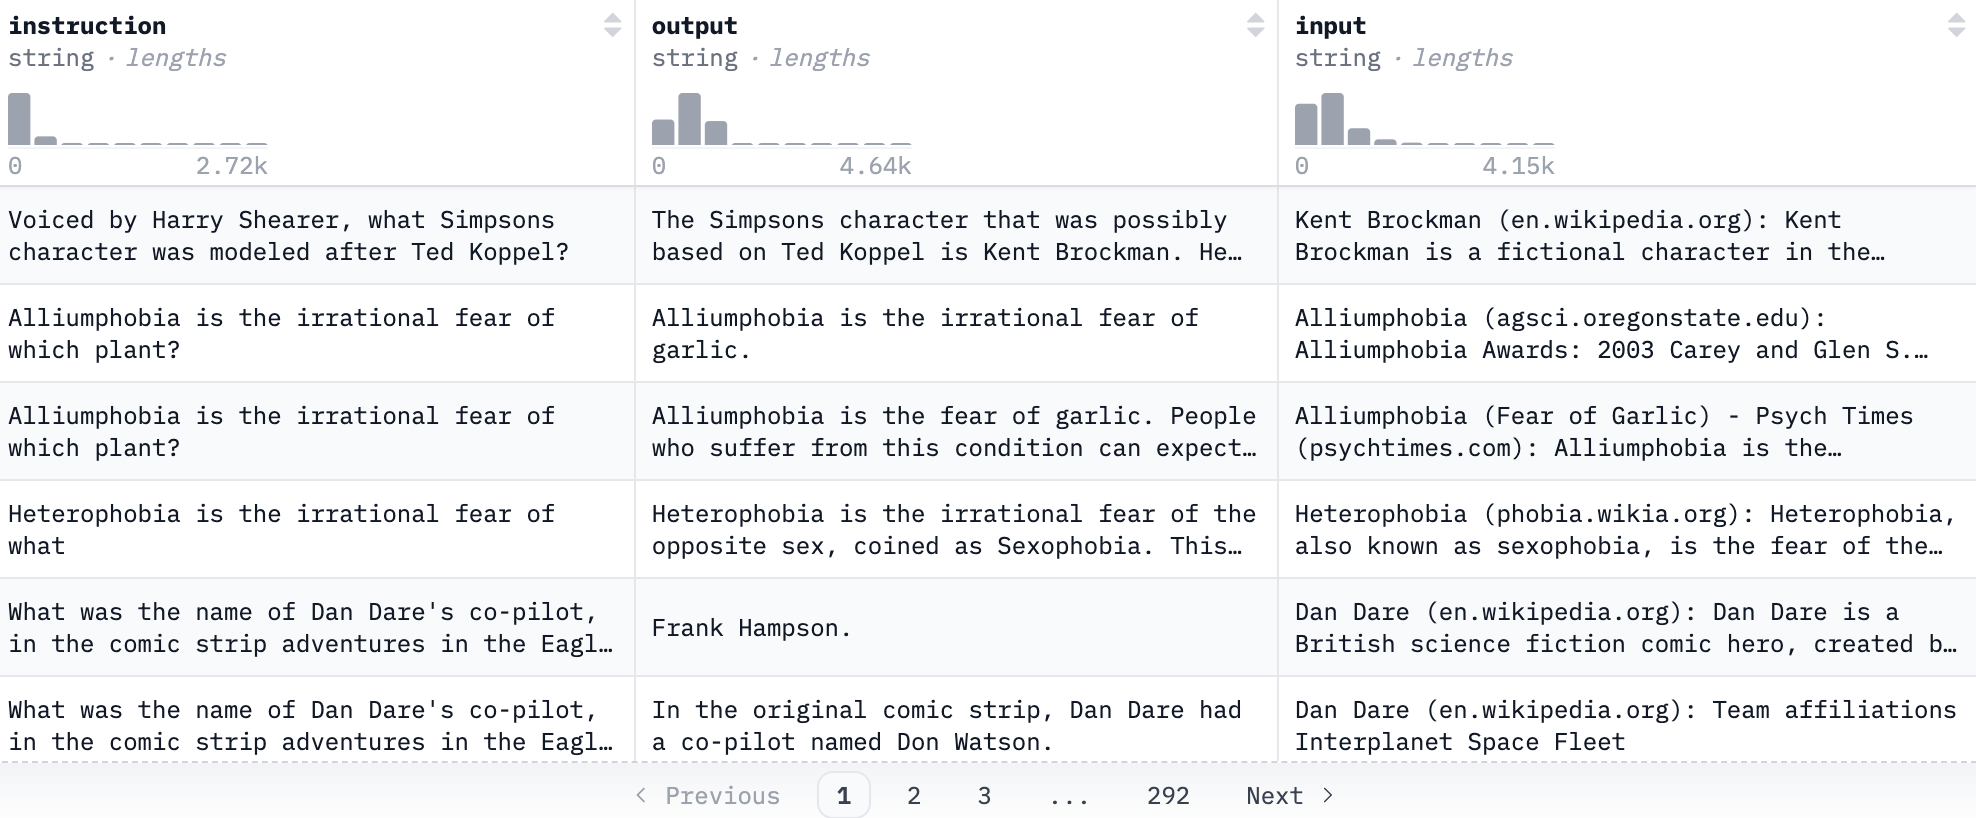

In [4]:
prompt = """Based on given instruction and input, generate an appropriate response

### Instruction:
{}

### Input:
{}

### Response:
{}
"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    contexts = examples["input"]
    responses = examples["output"]
    texts = []

    for i,j,k  in zip(instructions, contexts,responses):
        text = prompt.format(i,j,k) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("starfishmedical/webGPT_x_dolly", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True)

# Finetuning Gemma 2b

In [6]:
from trl import SFTTrainer
from transformers import TrainingArguments

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 8,
        gradient_accumulation_steps = 16,
        warmup_steps = 2,
        max_steps = 10,
        learning_rate = 0.0005,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 1357,
        output_dir = "outputs",
    ),
)

# Training
trainer_stats = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1965: FutureWarning: `--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:269: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:283: UserWarning: You passed a `dataset_num_proc` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:307: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
==((====))==  Unsloth - 2x fa

Step,Training Loss
1,1.874000
2,1.830200
3,1.823500
4,1.846600
5,1.834700
6,1.851800
7,1.896000
8,1.847000
9,1.876100
10,1.838900


# Ask your new assistant!

In [9]:
inputs = tokenizer(
    [
        prompt.format(
            "Provide a detailed explanation phobias and its varations",  # instruction
            " The goal is to offer a clear and informative account in medical terms",  # context
            " ",  # response
        )
    ] * 1,
    return_tensors="pt",
).to("cuda")

# Generate response
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=2048)

<bos>Based on given instruction and input, generate an appropriate response

### Instruction:
Provide a detailed explanation phobias and its varations

### Input:
 The goal is to offer a clear and informative account in medical terms

### Response:
 
Phobias are irrational fears of specific objects or situations that are usually exaggerated and out of proportion to the actual danger. They are often accompanied by intense anxiety and avoidance behaviors. Phobias are often triggered by a specific memory or event that is perceived as threatening. The fear is often so intense that it interferes with daily life and can even lead to panic attacks. Phobias are often treated with cognitive behavioral therapy, which involves changing the way the person thinks about the phobia and the way they react to it. In some cases, medication may be used to help control the symptoms.
<eos>
